1a) First, you will load all three dataset (products, orders, and customers) and merge
them together into one single data frame for further analysis. Remember, you
can link three dataset together by using the product.id and customer.id in the
orders table.

In [1]:
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import xlrd
import csv
## Converting to CSV for useful dataframe operations
def csv_from_excel():
    wb = xlrd.open_workbook('bikes.xlsx')
    sheet = wb.sheet_by_name('Sheet1')
    your_csv_file = open('bikes.csv', 'w')
    write = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)
    for rownum in range(sheet.nrows):
        write.writerow(sheet.row_values(rownum))
    your_csv_file.close()
csv_from_excel()

def csv_from_excel():
    wb = xlrd.open_workbook('bikeshops.xlsx')
    sheet = wb.sheet_by_name('Sheet1')
    your_csv_file = open('bikeshops.csv', 'w')
    write = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)
    for rownum in range(sheet.nrows):
        write.writerow(sheet.row_values(rownum))
    your_csv_file.close()
csv_from_excel()

def csv_from_excel():
    wb = xlrd.open_workbook('orders.xlsx')
    sheet = wb.sheet_by_name('Sheet1')
    your_csv_file = open('orders.csv', 'w')
    write = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)
    for rownum in range(sheet.nrows):
        write.writerow(sheet.row_values(rownum))
    your_csv_file.close()
csv_from_excel()

#sorting the values corresponding to 2009Q4
df1 =pd.read_csv('bikes.csv')
df2=pd.read_csv('bikeshops.csv')
df3=pd.read_csv('orders.csv')
df = pd.concat([df1,df2,df3], axis=1)

1b) Next, convert the unit price to categorical high/low variables. To do this, you can
divide the unit prices into two halves using the median as the split point.
Spread the customers by quantity of bike models purchased. To do this, you can
group the data by model & model features (bikeshop.name', 'model', 'category1',
'category2', 'frame', 'price') and summarize by quantity purchased. Then, you
can use a pivot table to spread the aggregated data across different bikeshops.

In [2]:
df1["product.id"]=df1["bike.id"]
del df1["bike.id"]
df2["customer.id"]=df2["bikeshop.id"]
del df2["bikeshop.id"]


In [3]:
s=df3["customer.id"].values
d=df3["product.id"].values
dfnew=pd.merge(left=df1,right=df3,left_on='product.id',right_on='product.id')
df_main=pd.merge(left=dfnew,right=df2,left_on='customer.id',right_on='customer.id')


In [4]:
df_main['unit price']=df_main['price']

In [5]:
df_main['categorical'] = pd.cut(df_main['unit price'],bins = range(0,len(df_main['unit price'])+1,int(df_main['unit price'].median())))

In [6]:
groupednew = df_main.groupby(['bikeshop.name', 'model', 'category1','category2', 'frame', 'price','categorical'])['quantity'].sum().reset_index()


In [7]:
customers=df_main["bikeshop.name"].unique()
len(customers)

30

In [8]:
groupednew

,bikeshop.name,model,category1,category2,frame,price,categorical,quantity
0,Albuquerque Cycles,Bad Habit 1,Mountain,Trail,Aluminum,3200.0,"(2700, 5400]",5.0
1,Albuquerque Cycles,Bad Habit 2,Mountain,Trail,Aluminum,2660.0,"(0, 2700]",2.0
2,Albuquerque Cycles,Beast of the East 1,Mountain,Trail,Aluminum,2770.0,"(2700, 5400]",3.0
3,Albuquerque Cycles,Beast of the East 2,Mountain,Trail,Aluminum,2130.0,"(0, 2700]",3.0
4,Albuquerque Cycles,Beast of the East 3,Mountain,Trail,Aluminum,1620.0,"(0, 2700]",1.0
5,Albuquerque Cycles,CAAD Disc Ultegra,Road,Elite Road,Aluminum,2660.0,"(0, 2700]",4.0
6,Albuquerque Cycles,CAAD12 105,Road,Elite Road,Aluminum,1680.0,"(0, 2700]",2.0
7,Albuquerque Cycles,CAAD12 Disc 105,Road,Elite Road,Aluminum,1950.0,"(0, 2700]",4.0
8,Albuquerque Cycles,CAAD12 Disc Dura Ace,Road,Elite Road,Aluminum,4260.0,"(2700, 5400]",14.0
9,Albuquerque Cycles,CAAD12 Red,Road,Elite Road,Aluminum,3200.0,"(2700, 5400]",4.0


1c) Last, we need to scale the quantity data. Unadjusted quantities presents a
problem to the k-means algorithm. Some customers are larger than others
meaning they purchase higher volumes. Fortunately, we can resolve this issue
by converting the customer order quantities to proportion of the total bikes
purchased by a customer.

In [9]:
## algorithm to generate scaled normalized values
## we specify two empty lists
empty_list={}
empty_list1={}
empty_list2={}
empty_list3={}
operational_list={}
data=pd.DataFrame()
for i in range(0,30):
    operational_list=(groupednew.loc[groupednew["bikeshop.name"] == customers[i]]) ##df one: which aggregates the bikeshop name data based on customers
    empty_list[i]=(operational_list['quantity']/operational_list['quantity'].sum()).values ##df two: which takes the quantity column of df one and normalizes them
    empty_list1[i]=(operational_list['quantity']).values.sum()
    empty_list2[i]=(operational_list['price']).values.sum()
    empty_list3[i]=(operational_list['model']).values.sum()
    temporary_list=pd.DataFrame(empty_list[i].tolist()) ## we add the matched list values to a temporary dataframe
    data=data.append(temporary_list) ## we append the temporary dataframe to the main dataframe 
    

In [10]:
groupednew["scaled values"]=data.values ## normalize the quantity column

In [11]:
groupednew ## the dataframe grouped according to the bikeshop name and normalized quantity

,bikeshop.name,model,category1,category2,frame,price,categorical,quantity,scaled values
0,Albuquerque Cycles,Bad Habit 1,Mountain,Trail,Aluminum,3200.0,"(2700, 5400]",5.0,0.007595
1,Albuquerque Cycles,Bad Habit 2,Mountain,Trail,Aluminum,2660.0,"(0, 2700]",2.0,0.005063
2,Albuquerque Cycles,Beast of the East 1,Mountain,Trail,Aluminum,2770.0,"(2700, 5400]",3.0,0.005063
3,Albuquerque Cycles,Beast of the East 2,Mountain,Trail,Aluminum,2130.0,"(0, 2700]",3.0,0.027848
4,Albuquerque Cycles,Beast of the East 3,Mountain,Trail,Aluminum,1620.0,"(0, 2700]",1.0,0.010127
5,Albuquerque Cycles,CAAD Disc Ultegra,Road,Elite Road,Aluminum,2660.0,"(0, 2700]",4.0,0.027848
6,Albuquerque Cycles,CAAD12 105,Road,Elite Road,Aluminum,1680.0,"(0, 2700]",2.0,0.012658
7,Albuquerque Cycles,CAAD12 Disc 105,Road,Elite Road,Aluminum,1950.0,"(0, 2700]",4.0,0.025316
8,Albuquerque Cycles,CAAD12 Disc Dura Ace,Road,Elite Road,Aluminum,4260.0,"(2700, 5400]",14.0,0.020253
9,Albuquerque Cycles,CAAD12 Red,Road,Elite Road,Aluminum,3200.0,"(2700, 5400]",4.0,0.002532


The next step is to create a pivot table for kmeans clustering

In [12]:
final_pivot = groupednew.pivot_table(index =['model', 'category1', 'category2', 'frame', 'price'],columns = 'bikeshop.name',values ='scaled values')
final_pivot.fillna(0,inplace = True)
final_pivot

,,,,bikeshop.name,Albuquerque Cycles,Ann Arbor Speed,Austin Cruisers,Cincinnati Speed,Columbus Race Equipment,Dallas Cycles,Denver Bike Shop,Detroit Cycles,Indianapolis Velocipedes,Ithaca Mountain Climbers,...,Philadelphia Bike Shop,Phoenix Bi-peds,Pittsburgh Mountain Machines,Portland Bi-peds,Providence Bi-peds,San Antonio Bike Shop,San Francisco Cruisers,Seattle Race Equipment,Tampa 29ers,Wichita Speed
model,category1,category2,frame,price,,,,,,,,,,,,,,,,,,,,,
Bad Habit 1,Mountain,Trail,Aluminum,3200.0,0.007595,0.014719,0.015528,0.009317,0.007673,0.005435,0.006645,0.016129,0.007911,0.025281,...,0.001729,0.015846,0.004938,0.037135,0.014451,0.024490,0.007812,0.022843,0.012821,0.015723
Bad Habit 2,Mountain,Trail,Aluminum,2660.0,0.005063,0.021645,0.020186,0.000000,0.000000,0.016304,0.009967,0.016129,0.004747,0.016854,...,0.006626,0.017862,0.019753,0.015915,0.008671,0.000000,0.031250,0.012690,0.000000,0.000000
Beast of the East 1,Mountain,Trail,Aluminum,2770.0,0.005063,0.009524,0.013975,0.000000,0.000000,0.006522,0.014950,0.016129,0.019778,0.014045,...,0.000000,0.021896,0.015915,0.006270,0.017341,0.008163,0.000000,0.020305,0.004274,0.000000
Beast of the East 2,Mountain,Trail,Aluminum,2130.0,0.027848,0.015584,0.009317,0.000000,0.010230,0.021739,0.009967,0.010753,0.019778,0.002809,...,0.000000,0.021608,0.002653,0.003135,0.008671,0.008163,0.031250,0.020305,0.012821,0.018868
Beast of the East 3,Mountain,Trail,Aluminum,1620.0,0.010127,0.014719,0.000000,0.000000,0.010230,0.021739,0.003322,0.010753,0.000000,0.011236,...,0.002017,0.012100,0.005305,0.009404,0.014451,0.016327,0.000000,0.005076,0.004274,0.000000
CAAD Disc Ultegra,Road,Elite Road,Aluminum,2660.0,0.027848,0.014719,0.003106,0.012422,0.012788,0.000000,0.026578,0.021505,0.011867,0.000000,...,0.007203,0.010660,0.010610,0.009404,0.014451,0.008163,0.015625,0.015228,0.000000,0.012579
CAAD12 105,Road,Elite Road,Aluminum,1680.0,0.012658,0.021645,0.031056,0.013975,0.012788,0.020652,0.014950,0.010753,0.022152,0.005618,...,0.005762,0.012100,0.000000,0.009404,0.002890,0.004082,0.007812,0.005076,0.000000,0.015723
CAAD12 Black Inc,Road,Elite Road,Aluminum,5860.0,0.000000,0.023377,0.006211,0.004658,0.025575,0.014130,0.016611,0.010753,0.014241,0.011236,...,0.010084,0.010372,0.002653,0.009404,0.008671,0.000000,0.023438,0.000000,0.000000,0.009434
CAAD12 Disc 105,Road,Elite Road,Aluminum,1950.0,0.025316,0.017316,0.007764,0.001553,0.015345,0.020652,0.014950,0.005376,0.027690,0.015449,...,0.010084,0.007407,0.000000,0.015674,0.005780,0.004082,0.015625,0.020305,0.000000,0.009434


2) Fit a k-means Clustering model on preprocessed data. You can use the k-means
package from the scikit-learn library in python. Refer to external resources if you
need more information on the scikit-learn library.

Based on the Kmeans clustering algorithm, we divide the data set into a number of cluaters

In [13]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=8)
kmeans = kmeans.fit(final_pivot) # Fitting the input data
labels = kmeans.predict(final_pivot) # Getting the cluster labels
centroids = kmeans.cluster_centers_ # Centroid values

print(centroids)

[[0.01202763 0.01016013 0.01516961 0.01189539 0.00701845 0.01404682
  0.01337285 0.00695862 0.01867895 0.00555426 0.01007027 0.00617818
  0.0059488  0.00714183 0.00866296 0.01418842 0.01002442 0.01159891
  0.01168732 0.00871216 0.00986193 0.0128966  0.00244848 0.01019959
  0.00514061 0.01009125 0.0059486  0.00569189 0.00262985 0.01088534]
 [0.00981013 0.01807359 0.01106366 0.00653087 0.01246182 0.01766304
  0.01225083 0.01478495 0.01226266 0.01264045 0.01661995 0.00714945
  0.01005245 0.00835561 0.01801607 0.01241759 0.00643058 0.00847458
  0.0062004  0.01617199 0.00878709 0.01001072 0.00744261 0.01492042
  0.01086027 0.00459184 0.02128609 0.00793147 0.00320513 0.01336478]
 [0.00901602 0.00663781 0.00445135 0.00491414 0.01204856 0.00746377
  0.01475488 0.0134953  0.00387273 0.0141914  0.01059939 0.00794347
  0.00863842 0.00615336 0.00891102 0.01247343 0.00801429 0.00285952
  0.01037544 0.00711168 0.00981465 0.00872428 0.01980548 0.01559244
  0.0150407  0.00863733 0.00477739 0.00203046 

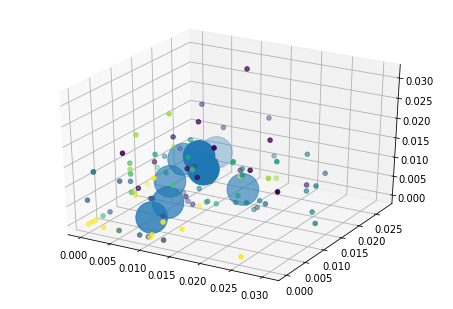

In [14]:
figureplot = plt.figure()
axiom = Axes3D(figureplot)
axiom.scatter(final_pivot.iloc[:, 0], final_pivot.iloc[:, 1], final_pivot.iloc[:, 2], c=labels)
axiom.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', s=1000,cmap='viridis')

number of clusters=2

In [15]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(final_pivot) # Fitting the input data
labels = kmeans.predict(final_pivot) # Getting the cluster labels
centroids = kmeans.cluster_centers_ # Centroid values


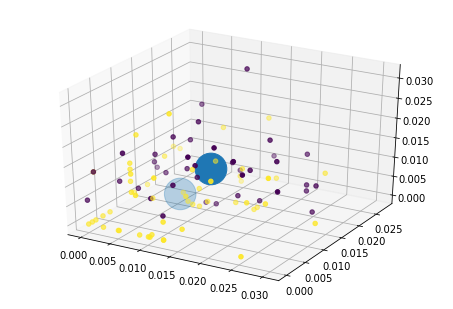

In [16]:
##PLOT THE CLUSTERS
figureplot = plt.figure()
axiom = Axes3D(figureplot)
axiom.scatter(final_pivot.iloc[:, 0], final_pivot.iloc[:, 1], final_pivot.iloc[:, 2], c=labels)
axiom.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o',s=1000,cmap='viridis')

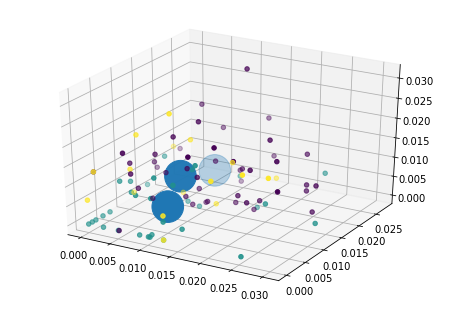

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(final_pivot)# Fitting the input data
labels = kmeans.predict(final_pivot) # Getting the cluster labels
centroids = kmeans.cluster_centers_ # Centroid values
figureplot = plt.figure()
axiom = Axes3D(figureplot)
axiom.scatter(final_pivot.iloc[:, 0], final_pivot.iloc[:, 1], final_pivot.iloc[:, 2], c=labels)
axiom.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', s=1000,cmap='viridis')

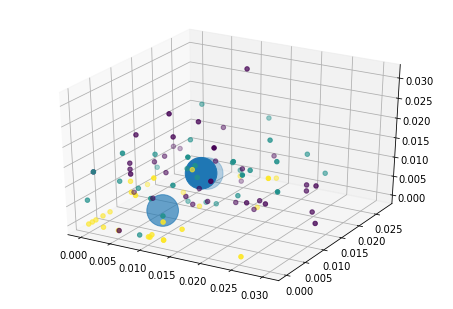

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(final_pivot)# Fitting the input data
labels = kmeans.predict(final_pivot) # Getting the cluster labels
centroids = kmeans.cluster_centers_ # Centroid values
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(final_pivot.iloc[:, 0], final_pivot.iloc[:, 1], final_pivot.iloc[:, 2], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', s=1000,cmap='viridis')

Fit a k-means Clustering model on preprocessed data. You can use the k-means
package from the scikit-learn library in python. Refer to external resources if you
need more information on the scikit-learn library.

I have used the silhoutte analysis to choose the best cluster from the above problem

For n_clusters = 2 The average silhouette_score is : 0.06544162336673011


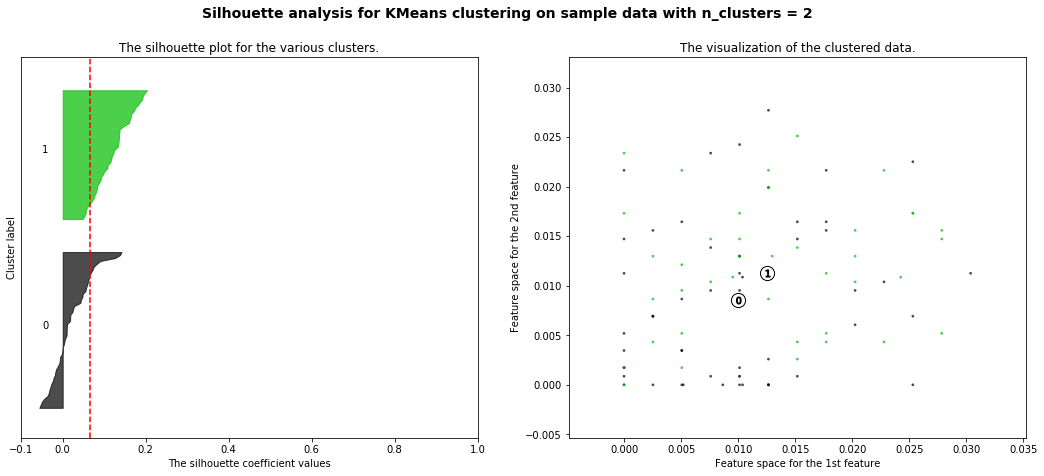

For n_clusters = 3 The average silhouette_score is : 0.06275732942848425


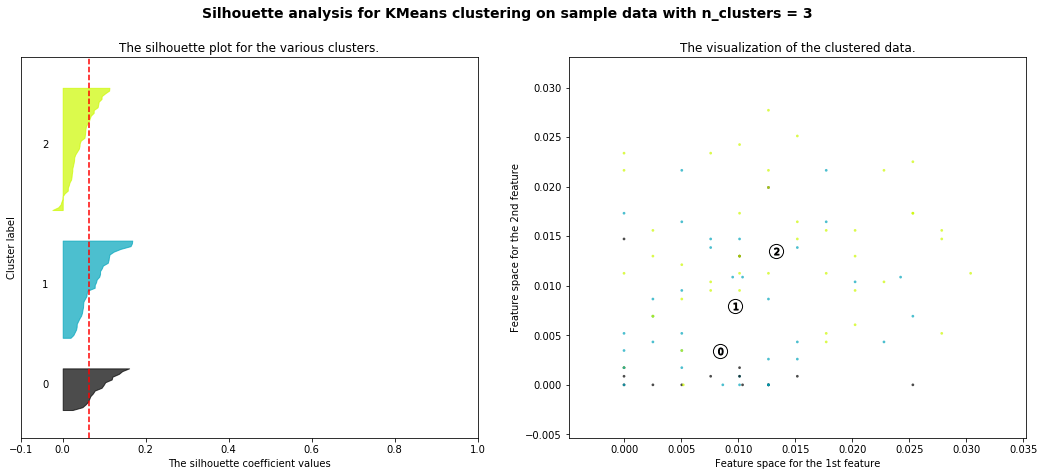

For n_clusters = 4 The average silhouette_score is : 0.060274813619295056


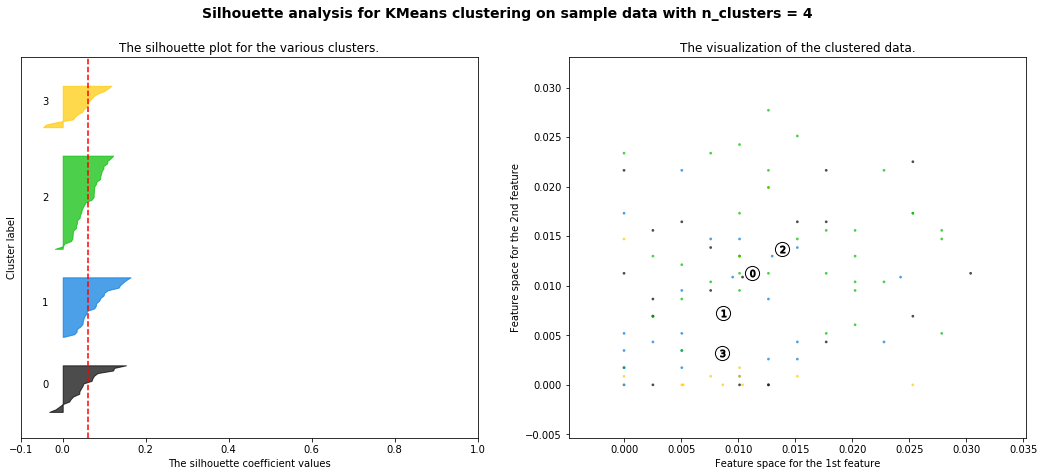

For n_clusters = 5 The average silhouette_score is : 0.05807300551295316


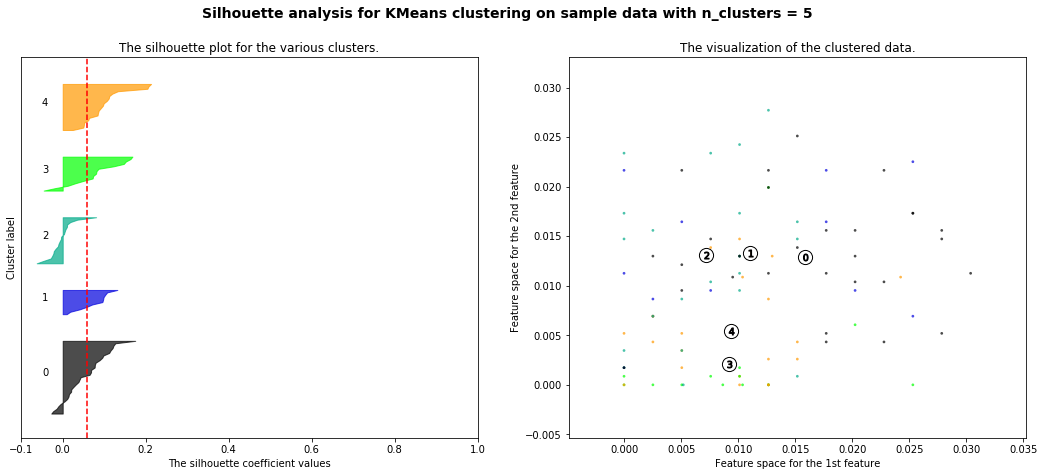

For n_clusters = 6 The average silhouette_score is : 0.05423708177950268


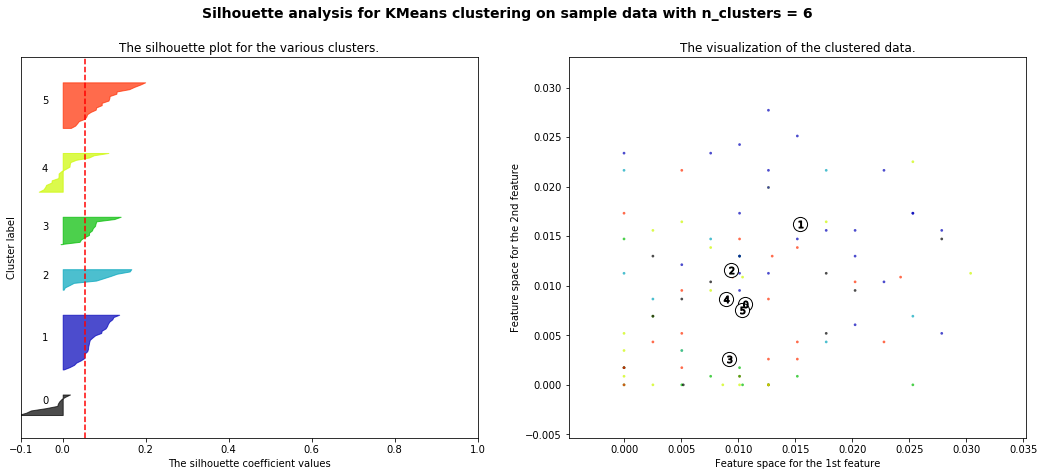

In [19]:
X = final_pivot

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
   
    fig, (ax1, ax2) = plt.subplots(1, 2)  # Create a subplot with 1 row and 2 columns
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])   # The (n_clusters+1)*10 is for inserting blank space between silhouette
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)  # Initialize the clusterer with n_clusters value and a random generator
    cluster_labels = clusterer.fit_predict(X)  # seed of 10 for reproducibility.
    #we calculate the silhoutte avg score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):       # Aggregate the silhouette scores for samples belonging to
                                        # cluster i, and sort them
  
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)      
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))  # Label the silhouette plots with their cluster numbers at the middle
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ## plotting the clusters and scores
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


Clearly state your choice of the parameter k and your assumption behind
choosing a specific k parameter. How many clusters do you think there should be
and why?

Answer:-Based on the silhoutte analysis we see that the clusters are evenly distributed in case of n=4

Print out customer names that are in each segment

In [20]:
result = zip(final_pivot,kmeans.labels_)
sorted_list = pd.DataFrame(sorted(result, key=lambda x: x[1]))
len(sorted_list)

30

In [21]:
sorted_list.columns = ['bikeshop.name', 'cluster']

Determine the preferences of the customer segments by by inspecting factors
related to the model ((e.g. price point, category of bike, etc). To do this, you need
to combine cluster centroids with bike models for feature inspection. Then for
each cluster, arrange top 10 bike models by cluster in descending order and print
out this information.

In [22]:
empty_list1 ## quantity of the 30 customers

{0: 395.0,
 1: 1155.0,
 2: 644.0,
 3: 391.0,
 4: 206.0,
 5: 920.0,
 6: 602.0,
 7: 186.0,
 8: 1264.0,
 9: 712.0,
 10: 624.0,
 11: 542.0,
 12: 286.0,
 13: 374.0,
 14: 246.0,
 15: 507.0,
 16: 1419.0,
 17: 2301.0,
 18: 504.0,
 19: 657.0,
 20: 3471.0,
 21: 405.0,
 22: 377.0,
 23: 319.0,
 24: 346.0,
 25: 245.0,
 26: 128.0,
 27: 394.0,
 28: 234.0,
 29: 318.0}

In [23]:
empty_list2 ## price of the 30 customers 

{0: 340170.0,
 1: 325755.0,
 2: 370725.0,
 3: 357635.0,
 4: 294300.0,
 5: 300935.0,
 6: 294755.0,
 7: 280375.0,
 8: 364725.0,
 9: 295285.0,
 10: 359755.0,
 11: 375315.0,
 12: 312985.0,
 13: 322045.0,
 14: 251635.0,
 15: 355010.0,
 16: 383515.0,
 17: 383515.0,
 18: 347285.0,
 19: 371795.0,
 20: 383515.0,
 21: 355815.0,
 22: 357760.0,
 23: 245215.0,
 24: 288245.0,
 25: 291795.0,
 26: 185285.0,
 27: 360695.0,
 28: 269765.0,
 29: 317325.0}

From the list it is evident that the first cluster has the maximum number of bikeshops.Hence the first cluster has  most features.Based on the column values the segmentation is based on price since the sorted list has different ranges of values of total price over the complete range.